In [74]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [75]:
data= pd.read_csv("C:/Users/Computer/Downloads/airline-passengers.csv")


In [76]:
data.shape

(144, 2)

In [110]:
#parse strings to Datetime type
data ['Month'] = pd.to_datetime(data['Month'],infer_datetime_format = True)
data= data.set_index(['Month'])

In [111]:
print(data.head())
print(data.tail())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


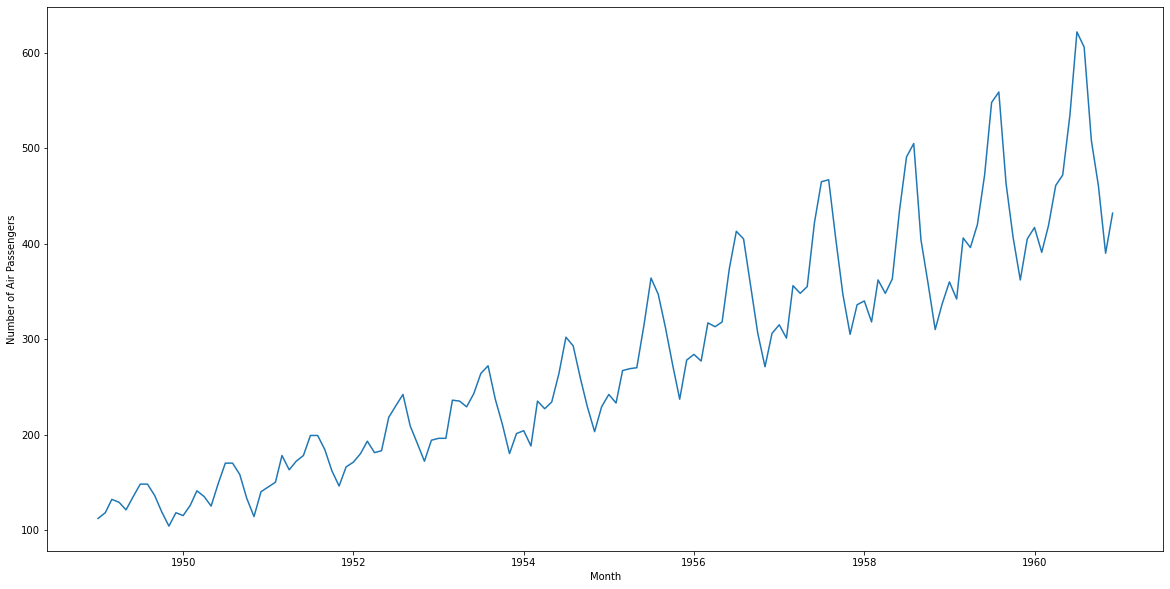

In [112]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

1.As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time

2.Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [113]:
#Determining Rolling Statistics:

rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


1.Plotting the Rolling Mean and Standard Deviation, which has window of 12

2.By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

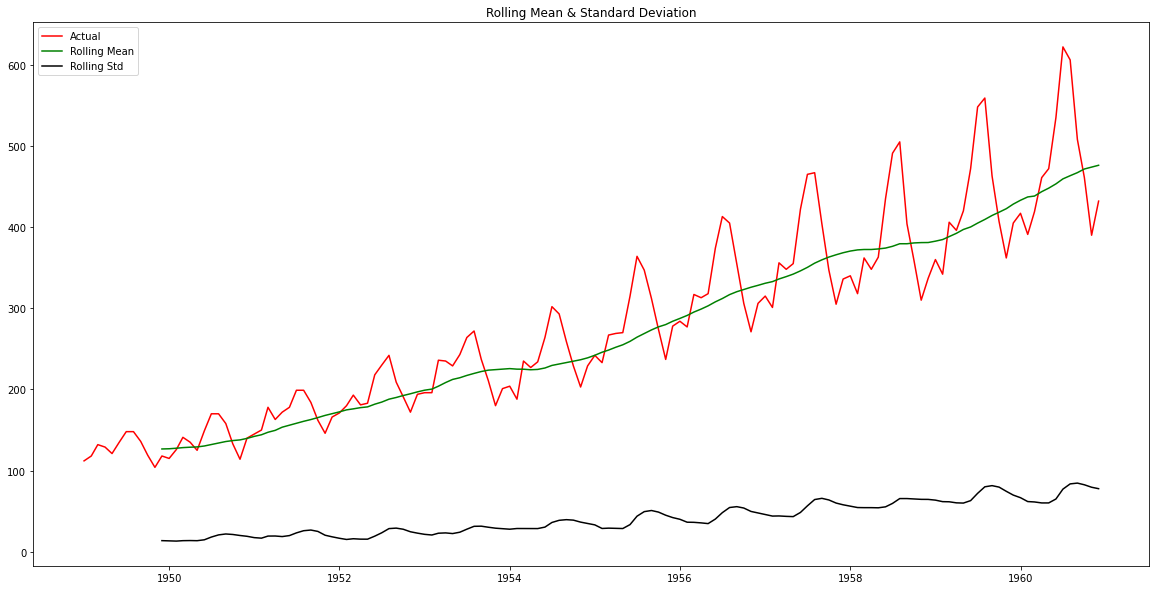

In [117]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

1.Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.

2.ADF has : Null hypothesis - Time Series is non-stationary

In [118]:
#Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


1.From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05.

2.Below we took log transformation to make our Time series stationary and plotted visual for it.

3.We found graph upward trending over time with seasonality

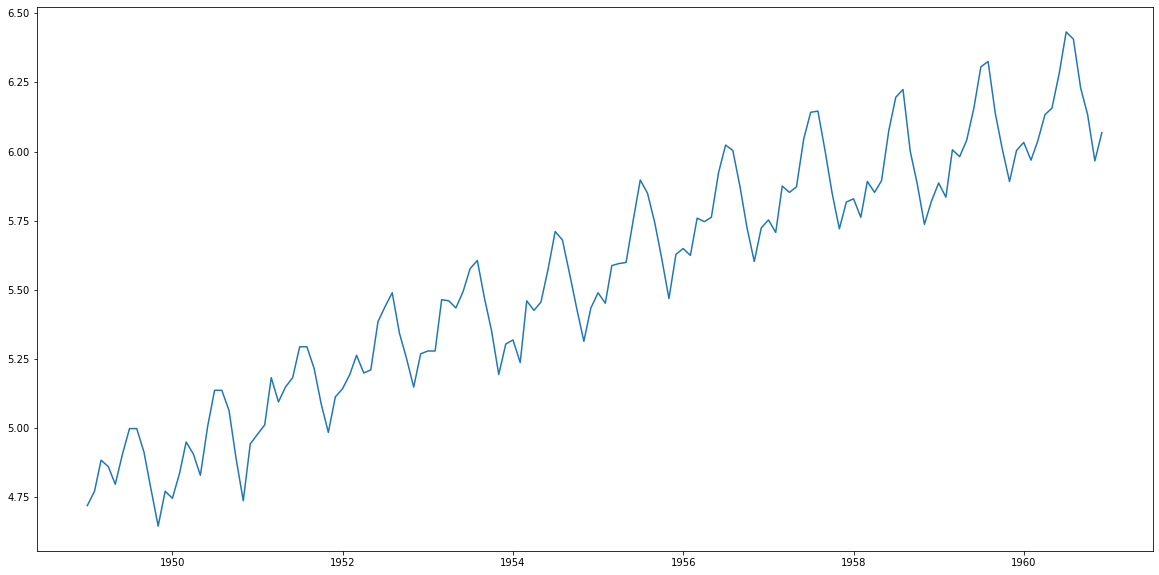

In [119]:
plt.figure(figsize=(20,10))
data_log=np.log(airline)
plt.plot(data_log)

Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

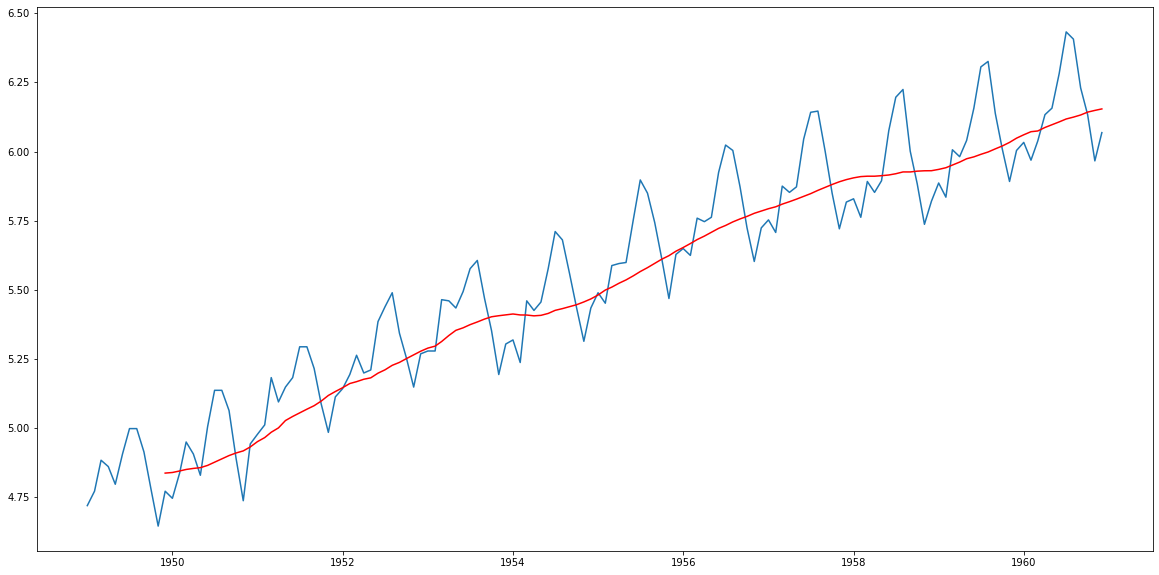

In [120]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

Using another method differencing, to make our time series stationary

In [121]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


Output of differencing method, after dropping null values

In [122]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


Defining function for Rolling Mean and Standard Deviation & ADF test

In [123]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

1.Checking the stationarity of differenced data

2.From Rolling method, we see that Mean and standard deviation is not varying.

3.From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)

4.Applying all the transformation and methods, our differenced data is now stationary

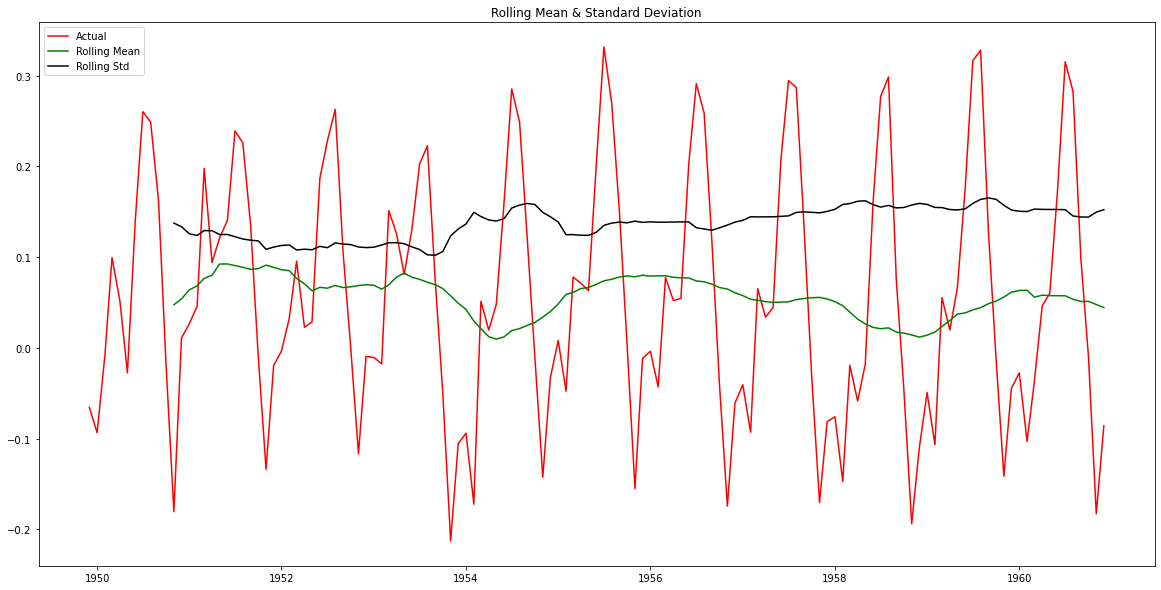

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [124]:
stationarity(data_log_diff)

Checking for Trend stationarity and performing exponential transformation on our data

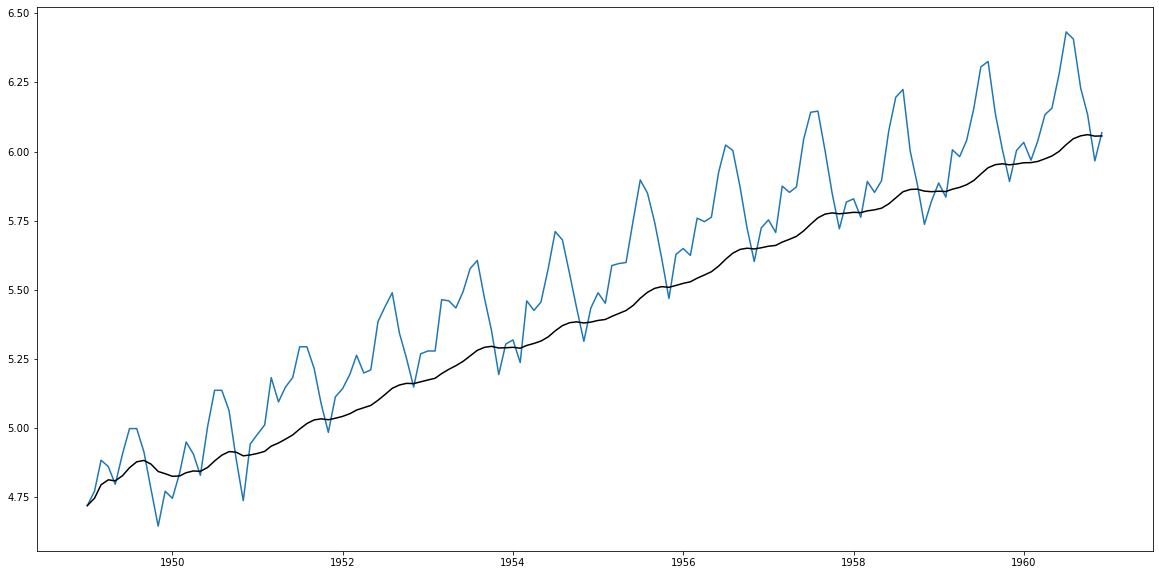

In [125]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

Since log transformation is non-stationary, applying differencing on our data.

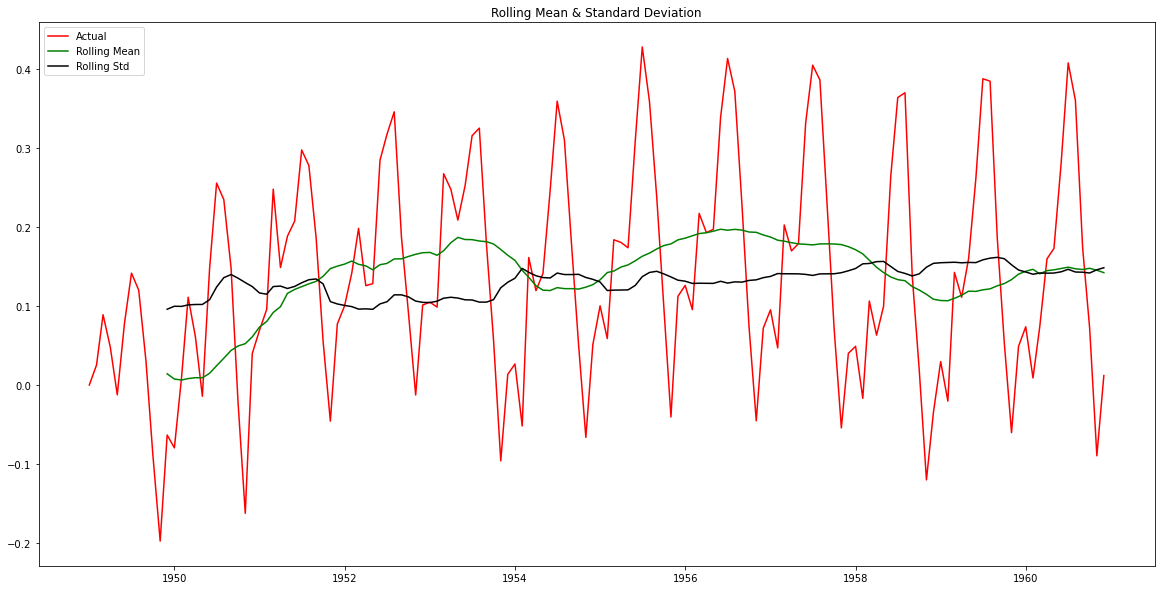

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [126]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

From above graph and ADF test, we conclude, it is trend stationary

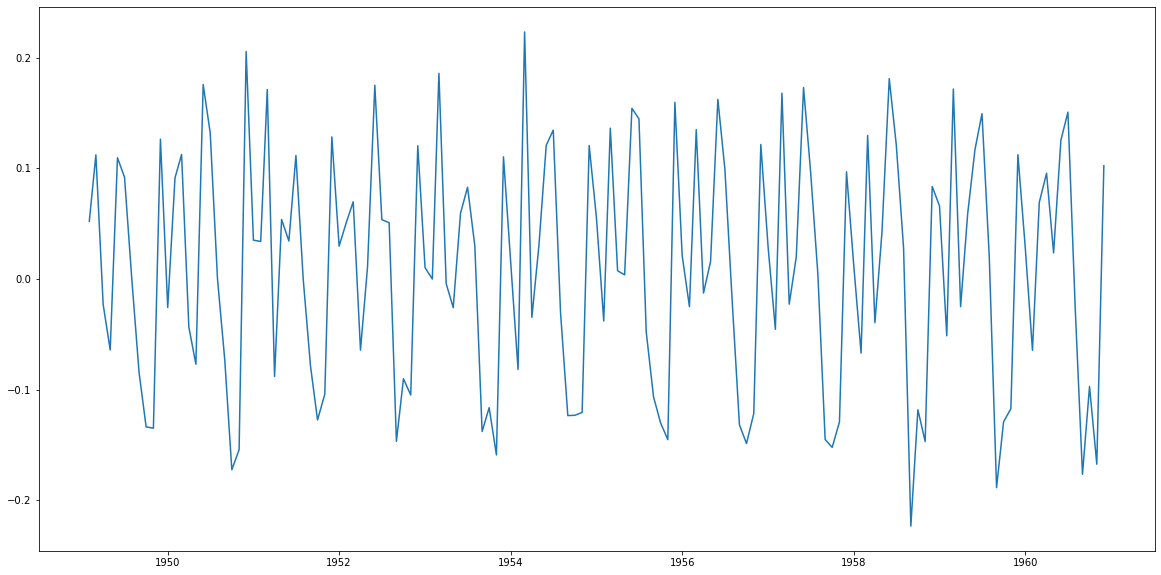

In [127]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

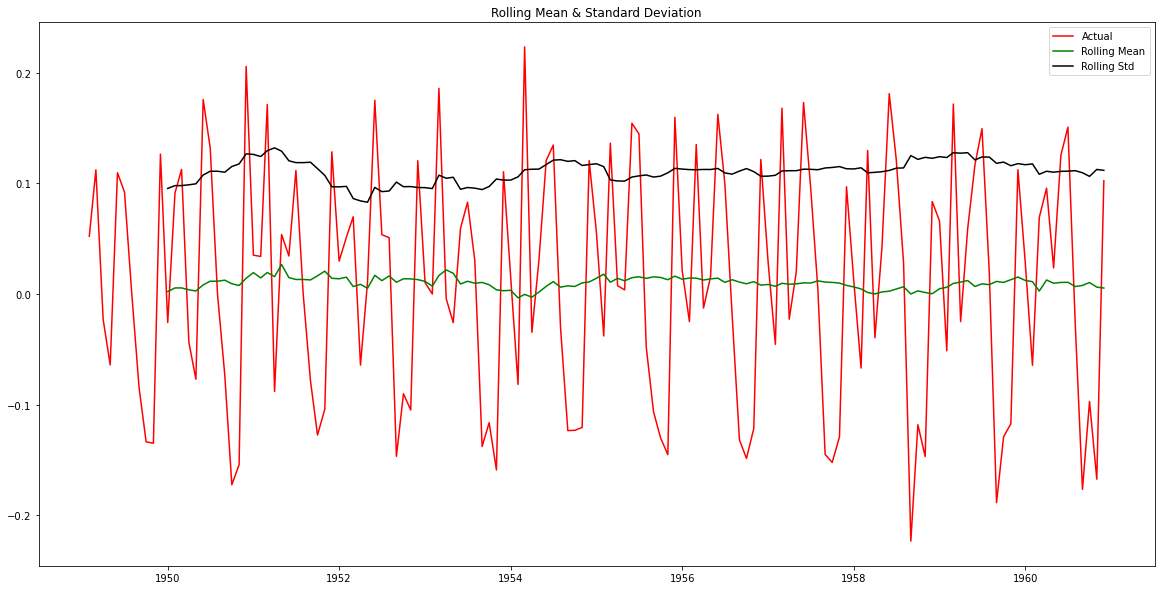

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [128]:
data_shift=data_shift.dropna()
stationarity(data_shift)

Decomposing Time Series into its components : Trend, Seasonality and Residual

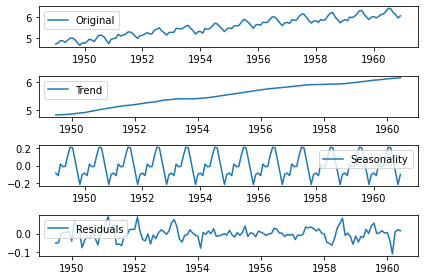

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


Checking the stationarity of Time Series components

In [130]:
decomp_data=residual
decomp_data=decomp_data.dropna(inplace = True)
stationarity(decomp_data)

AttributeError: 'NoneType' object has no attribute 'rolling'

1.Plotting the ACF and PACF to find q and p value

2.We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

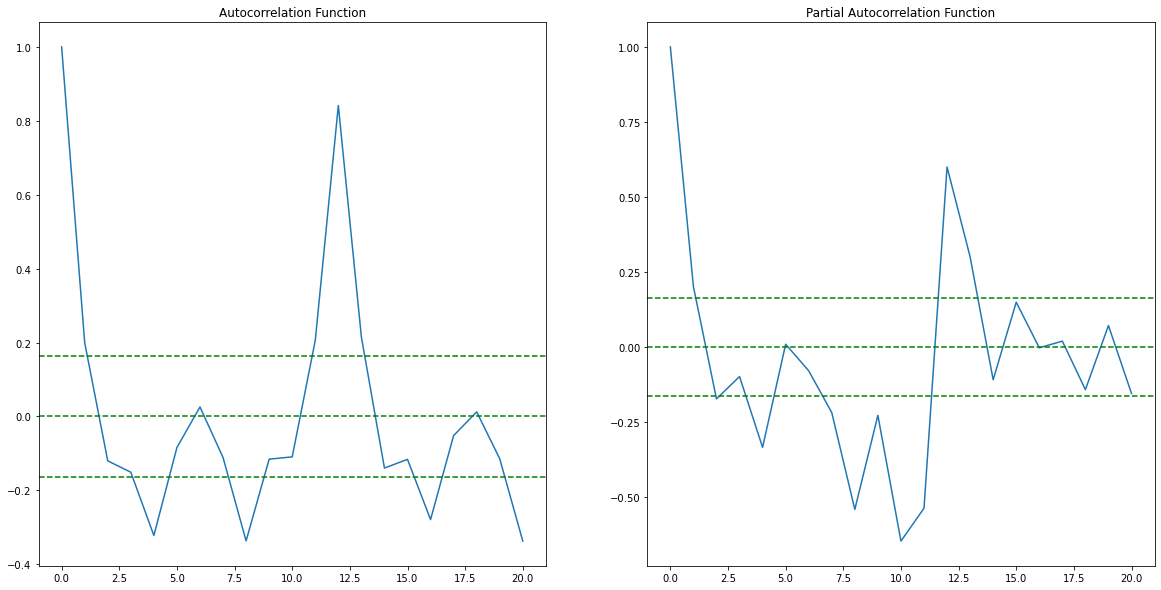

In [131]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

Building the ARIMA model with p=2, q=2 and I=1

C:\Users\Computer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Computer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


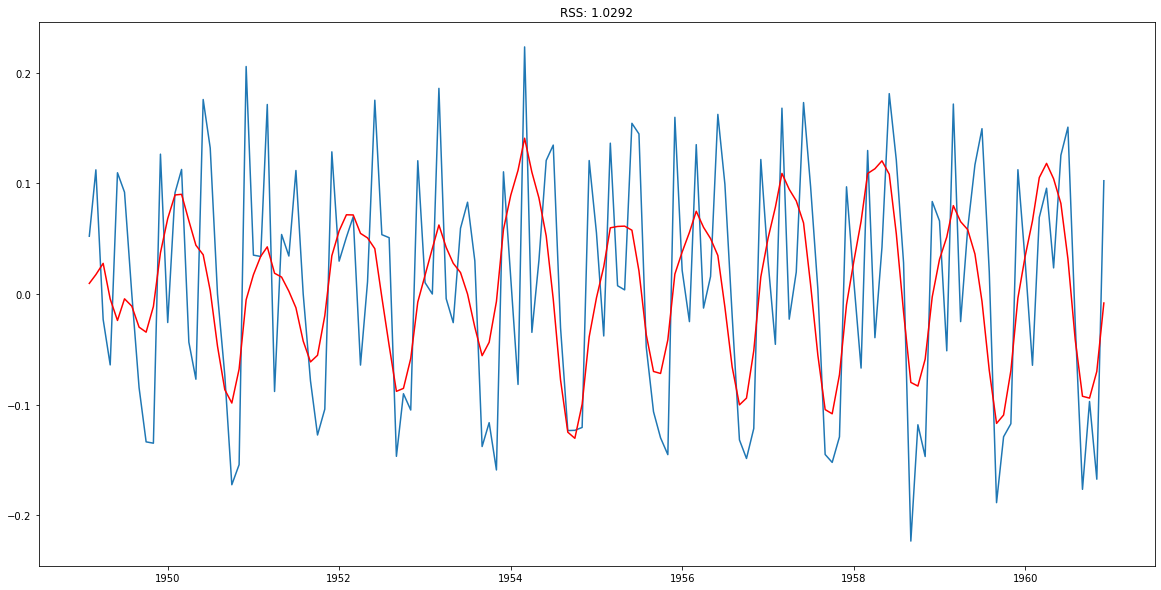

In [141]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

Predicted values from ARIMA model in difference form

In [135]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


Performing Inverse Transformation for differencing, by doing cumulative sum

In [136]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


Below is data display of predicted value in log scale

In [147]:
predictions_log=pd.Series(data_log['Passengers'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

AttributeError: 'Series' object has no attribute 'ix'

Taking out log transformation and visualizing actual vs predicted value graph

In [143]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

NameError: name 'predictions_log' is not defined

Plotting the visual for forecast of next 10 years with 95% confidence interval

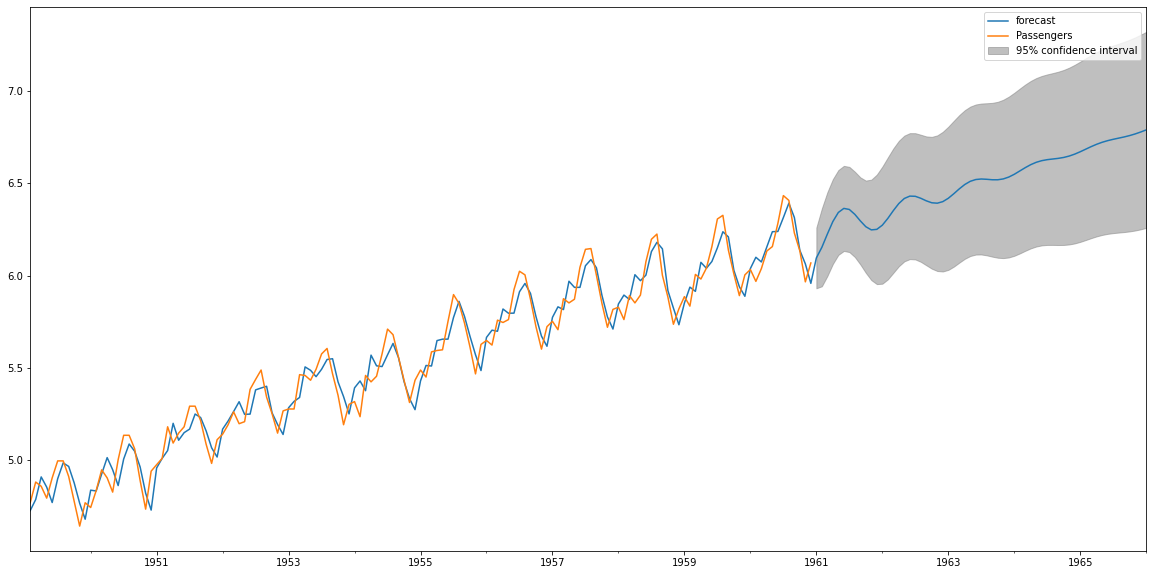

In [144]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [145]:
x[0]

array([6.09553394, 6.15281405, 6.22442968, 6.29241102, 6.34164717,
       6.36359362, 6.35784688, 6.33139308, 6.29597546, 6.2644772 ,
       6.24738332, 6.25025176, 6.27275838, 6.30940311, 6.35151491,
       6.38988652, 6.4172738 , 6.43011055, 6.42906693, 6.41842496,
       6.40456163, 6.39403624, 6.3918309 , 6.40019508, 6.41833694,
       6.44295407, 6.46937434, 6.49293985, 6.5102412 , 6.51989036,
       6.52267584, 6.52112395, 6.51864535, 6.51853698, 6.52311929,
       6.53322365, 6.54812873, 6.56591559, 6.5841031 , 6.60036542,
       6.6131327 , 6.62192786, 6.62737795, 6.63093136, 6.63438697,
       6.63937993, 6.64696512, 6.65739847, 6.6701533 , 6.68414255,
       6.6980663 , 6.71077906, 6.72157737, 6.7303399 , 6.73749818,
       6.74386387, 6.75037331, 6.75782601, 6.7666869 , 6.7769983 ,
       6.78841326, 6.8003286 , 6.81207201, 6.82308766, 6.83307143,
       6.842025  , 6.85022321, 6.8581123 , 6.86617349, 6.8747916 ,
       6.88416311, 6.89426392, 6.90487897, 6.91567946, 6.92632

In [146]:
np.exp(x[0])

array([ 443.87098337,  470.03824071,  504.9349853 ,  540.45480899,
        567.73069   ,  580.32809508,  577.00266039,  561.93887531,
        542.38466264,  525.56675039,  516.65912297,  518.14325664,
        529.93713117,  549.71673143,  573.36063887,  595.78896791,
        612.33149572,  620.24251144,  619.59555355,  613.03679303,
        604.59670471,  598.26645927,  596.94852985,  601.96245481,
        612.98283826,  628.25998635,  645.08000048,  660.46217145,
        671.98847925,  678.50399331,  680.39658549,  679.34149974,
        677.65977205,  677.58633453,  680.69837525,  687.61126266,
        697.93692037,  710.462092  ,  723.50184834,  735.36385444,
        744.81263874,  751.39227998,  755.49861726,  758.187991  ,
        760.81252289,  764.62072572,  770.4425704 ,  778.52294774,
        788.51647226,  799.62474877,  810.83639739,  821.21015849,
        830.12589833,  837.4318626 ,  843.4479405 ,  848.83419015,
        854.37765377,  860.76885672,  868.42992618,  877.43098